data/data.csv
有重複資料
562 => 522

In [1]:

import time
import math
import pickle

import statistics

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib
import matplotlib.pyplot as plt

from os import listdir
from os.path import join
from os.path import isfile

from itertools import combinations

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import f1_score

from libsvm.svmutil import svm_problem
from libsvm.svmutil import svm_parameter
from libsvm.svmutil import svm_train
from libsvm.svmutil import svm_predict
from libsvm.svmutil import evaluations

from Function import svm_function

In [62]:
print(np.load("data/Pse_in_One2/Chiu/output/DAC_lag3_svmf10p1e1_y_train.npy").shape)
print(np.load("data/Pse_in_One2/Chiu/output/DAC_lag3_svmf10p1e1_y_test.npy").shape)

(2, 2037)
(2, 227)
2264


In [3]:
method ="DCC_lag1"
cyto_df = pd.read_csv("data/Pse_in_One2/Chiu/ALL/pse_in_one2_output/benchmark_cyto_%s.csv" % method, header=None)
nuc_df = pd.read_csv("data/Pse_in_One2/Chiu/ALL/pse_in_one2_output/benchmark_nuc_%s.csv" % method, header=None)

# np.zeros(len(cyto_df)).append(np.ones(len(nuc_df)))
all_y_df = np.append(np.zeros(len(cyto_df)), np.ones(len(nuc_df)))
print(len(cyto_df))
print(len(nuc_df))
print(len(all_y_df))

idx = np.arange(len(all_y_df))
np.random.seed(1212)
np.random.shuffle(idx)

train_test_split_idx = int(len(idx)*0.8)
train_idx = idx[:train_test_split_idx]
test_idx = idx[train_test_split_idx:]

364
2467
2831


In [52]:
method ="SC-PseDNC-General"
cyto_df = pd.read_csv("data/Pse_in_One2/Chiu/ALL/pse_in_one2_output/benchmark_cyto_%s.csv" % method, header=None)
nuc_df = pd.read_csv("data/Pse_in_One2/Chiu/ALL/pse_in_one2_output/benchmark_nuc_%s.csv" % method, header=None)

all_np = np.append(cyto_df, nuc_df, axis=0)

np.save("data/Pse_in_One2/Chiu/train/benchmark_%s_train" % method, all_np[train_idx])
np.save("data/Pse_in_One2/Chiu/test/benchmark_%s_test" % method, all_np[test_idx])
# method ="DCC_lag1"

# cyto_df = pd.read_csv("data/Pse_in_One2/Chiu/ALL/pse_in_one2_output/benchmark_cyto_%s.csv" % method, header=None)
# nuc_df = pd.read_csv("data/Pse_in_One2/Chiu/ALL/pse_in_one2_output/benchmark_nuc_%s.csv" % method, header=None)
# all_df = cyto_df.append(nuc_df).reset_index(drop=True)

# all_df.loc[train_idx].to_csv("data/Pse_in_One2/Chiu/train/benchmark_%s_train.csv" % method)
# all_df.loc[test_idx].to_csv("data/Pse_in_One2/Chiu/test/benchmark_%s_test.csv" % method)

In [4]:
np.save("data/Pse_in_One2/Chiu/train/train_y", all_y_df[train_idx])
np.save("data/Pse_in_One2/Chiu/test/test_y", all_y_df[test_idx])

In [75]:
with open("data/Pse_in_One2/Chiu/ALL/for_pseinone_sc.fasta") as f:
    txt = f.read().split(">")[1:]
    arrays = []
    for i in range(len(txt)):
        arrays.append(txt[i].split("\n")[0].split(",")[1].split(";")[0])
print(len(arrays))

2827


In [76]:
psedpc_df = pd.read_csv("data/Pse_in_One2/Chiu/ALL/pse_in_one2_output/benchmark_PseDPC.csv", header=None)
psessc_df = pd.read_csv("data/Pse_in_One2/Chiu/ALL/pse_in_one2_output/benchmark_PseSSC.csv", header=None)
triplet_df = pd.read_csv("data/Pse_in_One2/Chiu/ALL/pse_in_one2_output/benchmark_Triplet.csv", header=None)

In [77]:
nc_np = pd.Series(arrays).replace(["Cyto", "Nuc"], [0, 1]).to_numpy()

In [78]:
idx = np.arange(len(nc_np))
np.random.seed(1212)
np.random.shuffle(idx)

train_test_split_idx = int(len(idx)*0.8)
train_idx = idx[:train_test_split_idx]
test_idx = idx[train_test_split_idx:]

In [79]:
print(psedpc_df.loc[train_idx].shape)
print(nc_np[train_idx].shape)
print(psedpc_df.loc[test_idx].shape)
print(nc_np[test_idx].shape)

(2261, 12)
(2261,)
(566, 12)
(566,)


In [80]:
print(np.unique(nc_np[train_idx], return_counts=True))
print(np.unique(nc_np[test_idx], return_counts=True))

(array([0, 1]), array([ 288, 1973]))
(array([0, 1]), array([ 76, 490]))


In [82]:
np.save("data/Pse_in_One2/Chiu/train/benchmark_PseDPC_train", psedpc_df.loc[train_idx].to_numpy())
np.save("data/Pse_in_One2/Chiu/test/benchmark_PseDPC_test", psedpc_df.loc[test_idx].to_numpy())
np.save("data/Pse_in_One2/Chiu/train/benchmark_PseSSC_train", psessc_df.loc[train_idx].to_numpy())
np.save("data/Pse_in_One2/Chiu/test/benchmark_PseSSC_test", psessc_df.loc[test_idx].to_numpy())
np.save("data/Pse_in_One2/Chiu/train/benchmark_Triplet_train", triplet_df.loc[train_idx].to_numpy())
np.save("data/Pse_in_One2/Chiu/test/benchmark_Triplet_test", triplet_df.loc[test_idx].to_numpy())

np.save("data/Pse_in_One2/Chiu/train/for_sc_train", nc_np[train_idx])
np.save("data/Pse_in_One2/Chiu/test/for_sc_test", nc_np[test_idx])

In [8]:
with open("data/Chiu/benchmark_cyto.out") as f:
    txt = f.read().split(">")[1:]
    arrays = []
    for i in range(len(txt)):
        arrays.append(txt[i].split("\n")[0].split(",")[1].split(";")[0])
print(len(arrays))

364


In [9]:
with open("data/Chiu/benchmark_nuc.out") as f:
    txt = f.read().split(">")[1:]
    arrays = []
    for i in range(len(txt)):
        arrays.append(txt[i].split("\n")[0].split(",")[1].split(";")[0])
print(len(arrays))

2467


In [29]:
nc_df = pd.read_csv("data/society/cdhit80_0320_loc75_NC.csv")

In [30]:
dir_path = "data/Pse_in_One2/DNA_0320/train/"
onlyfiles = [f for f in listdir(dir_path) if isfile(join(dir_path, f))]

auroc_array = []
for file_name in onlyfiles:
    if file_name.split(".")[-1] == "npy":
        file_path = dir_path + file_name
        file_name = ("").join(file_name.split(".")[:-1])
        output_file = "data/Pse_in_One2/DNA_0320/train/output/svm_e500_" + file_name + ".csv"
        shape = 0
        kernel = 0
        auroc = 0
        if isfile(output_file):
            df = pd.read_csv(output_file)
            shape = np.load(file_path).shape
            kernel = df["kernel"][0]
            auroc = df["value"][0]
        auroc_array.append([file_name, shape, kernel, auroc])
print(auroc_array)
        # print("nohup python hpo_svm_train.py -i %s -l data/society/train_y_0320_loc75_01.npy -o %s -m svm -p 8 -e 500 &> data/log/hpo_svm_train_svmp8e500_%s.txt &" % (file_path, output_path, file_name))
        # print()

[['human_RNA_sequence_cdhit80_0320_hasLoc_DCC_lag3_train', (738, 90), 'C_poly', 0.6241478452669771], ['human_RNA_sequence_cdhit80_0320_hasLoc_MAC_lag1_train', 0, 0, 0], ['human_RNA_sequence_cdhit80_0320_hasLoc_Mismatch_k2_m1_train', 0, 0, 0], ['human_RNA_sequence_cdhit80_0320_hasLoc_MAC_lag2_train', (738, 6), 'C_linear', 0.5904938297303884], ['human_RNA_sequence_cdhit80_0320_hasLoc_MAC_lag3_train', 0, 0, 0], ['human_RNA_sequence_cdhit80_0320_hasLoc_Mismatch_k3_m1_train', 0, 0, 0], ['human_RNA_sequence_cdhit80_0320_hasLoc_Mismatch_k3_m2_train', 0, 0, 0], ['human_RNA_sequence_cdhit80_0320_hasLoc_Mismatch_k4_m2_train', 0, 0, 0], ['human_RNA_sequence_cdhit80_0320_hasLoc_Mismatch_k4_m3_train', 0, 0, 0], ['human_RNA_sequence_cdhit80_0320_hasLoc_NMBAC_lag1_train', 0, 0, 0], ['human_RNA_sequence_cdhit80_0320_hasLoc_NMBAC_lag2_train', 0, 0, 0], ['human_RNA_sequence_cdhit80_0320_hasLoc_NMBAC_lag3_train', 0, 0, 0], ['human_RNA_sequence_cdhit80_0320_hasLoc_PC-PseDNC-General_train', (738, 18), 'C_p

In [31]:
pd.DataFrame(auroc_array, columns=["file", "shape", "kernel", "AUROC"])

,file,shape,kernel,AUROC
0,human_RNA_sequence_cdhit80_0320_hasLoc_DCC_lag...,"(738, 90)",C_poly,0.624148
1,human_RNA_sequence_cdhit80_0320_hasLoc_MAC_lag...,0,0,0.000000
2,human_RNA_sequence_cdhit80_0320_hasLoc_Mismatc...,0,0,0.000000
3,human_RNA_sequence_cdhit80_0320_hasLoc_MAC_lag...,"(738, 6)",C_linear,0.590494
4,human_RNA_sequence_cdhit80_0320_hasLoc_MAC_lag...,0,0,0.000000
5,human_RNA_sequence_cdhit80_0320_hasLoc_Mismatc...,0,0,0.000000
6,human_RNA_sequence_cdhit80_0320_hasLoc_Mismatc...,0,0,0.000000
7,human_RNA_sequence_cdhit80_0320_hasLoc_Mismatc...,0,0,0.000000
8,human_RNA_sequence_cdhit80_0320_hasLoc_Mismatc...,0,0,0.000000
9,human_RNA_sequence_cdhit80_0320_hasLoc_NMBAC_l...,0,0,0.000000


In [2]:
bprna_rnafold_df = pd.read_csv("data/bpRNA/RNAfold/RNAfold.csv")

In [35]:
tcga = ["U", "C", "G", "A"]
shmibxe = ["H", "M", "I", "B", "X", "E"]

col_array = []
for i in tcga:
    for j in shmibxe:
        col_array.append(i + "-" + j)
for i in tcga:
    for j in tcga:
        col_array.append(i + "-" + j)
col_array.append("Seq_ID")
print(col_array)
df = pd.DataFrame([], columns=col_array)

for j in range(len(bprna_rnafold_df["1"])):
    d = dict()
    s_list = list()
    for i in range(len(bprna_rnafold_df["1"][j])):
        if bprna_rnafold_df["2"][j][i] == ".":
            key = bprna_rnafold_df["1"][j][i] + "-" + bprna_rnafold_df["3"][j][i]
            if not key in d.keys():
                d[key] = 0
            d[key] += 1
        elif bprna_rnafold_df["2"][j][i] == "(":
            s_list.append(bprna_rnafold_df["1"][j][i])
        elif bprna_rnafold_df["2"][j][i] == ")":
            key = s_list.pop() + "-" + bprna_rnafold_df["1"][j][i]
            if not key in d.keys():
                d[key] = 0
            d[key] += 1
    for key in d.keys():
        d[key] = d[key] / len(bprna_rnafold_df["1"][j])
    d["Seq_ID"] = bprna_rnafold_df["0"][j]
    df = df.append(d, ignore_index=True)
df = df.fillna(0)

['U-H', 'U-M', 'U-I', 'U-B', 'U-X', 'U-E', 'C-H', 'C-M', 'C-I', 'C-B', 'C-X', 'C-E', 'G-H', 'G-M', 'G-I', 'G-B', 'G-X', 'G-E', 'A-H', 'A-M', 'A-I', 'A-B', 'A-X', 'A-E', 'U-U', 'U-C', 'U-G', 'U-A', 'C-U', 'C-C', 'C-G', 'C-A', 'G-U', 'G-C', 'G-G', 'G-A', 'A-U', 'A-C', 'A-G', 'A-A', 'Seq_ID']


In [5]:
tcga = ["U", "C", "G", "A"]
shmibxe = ["S", "H", "M", "I", "B", "X", "E"]

col_array = []
for i in tcga:
    for j in shmibxe:
        col_array.append(i + "-" + j)
col_array.append("Seq_ID")
print(col_array)

df = pd.DataFrame([], columns=col_array)
for j in range(len(bprna_rnafold_df["1"])):
    d = dict()
    for i in range(len(bprna_rnafold_df["1"][j])):
        key = bprna_rnafold_df["1"][j][i] + "-" + bprna_rnafold_df["3"][j][i]
        if not key in d.keys():
            d[key] = 0
        d[key] += 1
    for key in d.keys():
        d[key] = d[key] / len(bprna_rnafold_df["1"][j])
    d["Seq_ID"] = bprna_rnafold_df["0"][j]
    df = df.append(d, ignore_index=True)
df = df.fillna(0)

['U-S', 'U-H', 'U-M', 'U-I', 'U-B', 'U-X', 'U-E', 'C-S', 'C-H', 'C-M', 'C-I', 'C-B', 'C-X', 'C-E', 'G-S', 'G-H', 'G-M', 'G-I', 'G-B', 'G-X', 'G-E', 'A-S', 'A-H', 'A-M', 'A-I', 'A-B', 'A-X', 'A-E', 'Seq_ID']
           U-S       U-H       U-M       U-I       U-B       U-X       U-E  \
0     0.110549  0.026372  0.021843  0.029302  0.012786  0.000266  0.000000   
1     0.125806  0.024194  0.022581  0.020968  0.004839  0.000000  0.000000   
2     0.164721  0.017005  0.033249  0.029695  0.010152  0.000000  0.000000   
3     0.110459  0.017595  0.015152  0.013685  0.007331  0.000000  0.000978   
4     0.187457  0.039437  0.036310  0.038047  0.008687  0.000000  0.000347   
...        ...       ...       ...       ...       ...       ...       ...   
1314  0.168857  0.030334  0.030334  0.035389  0.010111  0.000000  0.002022   
1315  0.160248  0.016149  0.045963  0.045963  0.013665  0.000000  0.002484   
1316  0.158983  0.025437  0.034976  0.039746  0.012719  0.000000  0.003180   
1317  0.17024

In [39]:
data = pd.read_csv("data/society/cdhit80_0320_loc75_NC_SeqID_train.csv")

In [40]:
ranfold_bprna_df = pd.merge(data, df, on="Seq_ID", how="left")

In [27]:
df.head(10)

,U-S,U-H,U-M,U-I,U-B,U-X,U-E,C-S,C-H,C-M,...,G-X,G-E,A-S,A-H,A-M,A-I,A-B,A-X,A-E,Seq_ID
0,0.110549,0.026372,0.021843,0.029302,0.012786,0.000266,0.000000,0.222962,0.033298,0.024774,...,0.000266,0.000266,0.077251,0.022643,0.022376,0.025573,0.010389,0.000000,0.000000,NM_001077238.2
1,0.125806,0.024194,0.022581,0.020968,0.004839,0.000000,0.000000,0.204839,0.024194,0.030645,...,0.000000,0.001613,0.087097,0.022581,0.032258,0.053226,0.014516,0.000000,0.003226,NM_001145712.2
2,0.164721,0.017005,0.033249,0.029695,0.010152,0.000000,0.000000,0.153046,0.015482,0.022335,...,0.000000,0.000000,0.123096,0.035787,0.057360,0.039594,0.018020,0.000000,0.000254,NM_001199818.1
3,0.110459,0.017595,0.015152,0.013685,0.007331,0.000000,0.000978,0.221896,0.030792,0.029814,...,0.000000,0.000000,0.078201,0.031281,0.033236,0.030792,0.009775,0.000000,0.000978,NM_001251888.2
4,0.187457,0.039437,0.036310,0.038047,0.008687,0.000000,0.000347,0.106671,0.020327,0.028666,...,0.000000,0.000000,0.157054,0.046213,0.064628,0.048297,0.011119,0.000000,0.000174,NM_001254748.2
5,0.123314,0.029865,0.023121,0.019268,0.011079,0.000000,0.000000,0.191715,0.021676,0.023603,...,0.000000,0.000000,0.095857,0.034200,0.048651,0.038054,0.022158,0.000000,0.000000,NM_001262.3
6,0.157922,0.029001,0.031901,0.040865,0.008700,0.000000,0.000264,0.148431,0.022937,0.029528,...,0.000000,0.000000,0.126813,0.028210,0.044292,0.046138,0.014500,0.000000,0.000264,NM_001286724.2
7,0.150476,0.023123,0.020335,0.032071,0.008366,0.000000,0.000000,0.161748,0.028004,0.020102,...,0.000000,0.000000,0.120497,0.039856,0.042064,0.048803,0.012666,0.000000,0.000349,NM_001286792.2
8,0.133598,0.021825,0.013889,0.015873,0.014550,0.000000,0.001323,0.193783,0.029101,0.020503,...,0.000000,0.000661,0.104497,0.037037,0.030423,0.040344,0.016534,0.000000,0.000000,NM_001310142.1
9,0.146230,0.023198,0.016570,0.019884,0.004971,0.000000,0.000000,0.177713,0.028998,0.016156,...,0.000000,0.001657,0.108534,0.032312,0.035211,0.051367,0.021127,0.000414,0.002900,NM_001319657.2


In [41]:
df.to_csv("data/bpRNA/RNAfold/RNAfold_bpRNA.csv", index=False)

In [5]:
df = pd.read_csv("data/bpRNA/RNAfold/RNAfold_bpRNA.csv")
data = pd.read_csv("data/society/cdhit80_0320_loc75_NC_SeqID_train.csv")
train_df = pd.merge(data, df, on="Seq_ID", how="inner")
train_x = train_df[col_array[:-1]].to_numpy()

data = pd.read_csv("data/society/cdhit80_0320_loc75_NC_SeqID_test.csv")
test_df = pd.merge(data, df, on="Seq_ID", how="inner")
test_x = test_df[col_array[:-1]].to_numpy()

train_y = train_df["SubCellular_Localization"].replace(["Cytosolic", "Nucleus"], [0, 1]).to_numpy()
test_y = test_df["SubCellular_Localization"].replace(["Cytosolic", "Nucleus"], [0, 1]).to_numpy()

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

np.save("data/bpRNA/RNAfold/cdhit80_0320_loc75_NC_SeqID_RNAfold_bpRNA_train_x", train_x)
np.save("data/bpRNA/RNAfold/cdhit80_0320_loc75_NC_SeqID_RNAfold_bpRNA_train_y.npy", train_y)
np.save("data/bpRNA/RNAfold/cdhit80_0320_loc75_NC_SeqID_RNAfold_bpRNA_test_x", test_x)
np.save("data/bpRNA/RNAfold/cdhit80_0320_loc75_NC_SeqID_RNAfold_bpRNA_test_y", test_y)

(735, 28)
(735,)
(184, 28)
(184,)


In [84]:
train_idx = np.load("data/society/train_idx_0320_loc75.npy")
test_idx = np.load("data/society/test_idx_0320_loc75.npy")

In [88]:
isnull_idx = ranfold_bprna_df[ranfold_bprna_df["U-A"].isnull()].index

In [89]:
isnull_idx

Int64Index([60, 465], dtype='int64')

In [90]:
train_notnull_idx = train_idx[[not elem for elem in np.isin(train_idx, isnull_idx)]]
test_notnull_idx = test_idx[[not elem for elem in np.isin(test_idx, isnull_idx)]]

In [91]:
x = ranfold_bprna_df[col_array[:-1]].to_numpy()#.to_csv("data/bpRNA/RNAfold/cdhit80_0320_loc75_RNAfold_bpRNA.csv", index=False)
print(len(x))
train_x = x[train_notnull_idx]
test_x = x[test_notnull_idx]
print(len(x[train_notnull_idx]))
print(len(x[test_notnull_idx]))

train_y = ranfold_bprna_df.loc[train_notnull_idx]['SubCellular_Localization']
test_y = ranfold_bprna_df.loc[test_notnull_idx]['SubCellular_Localization']
print(train_y)
train_y = train_y.replace(["Cytosolic", "Nucleus"], [0, 1]).to_numpy()
test_y = test_y.replace(["Cytosolic", "Nucleus"], [0, 1]).to_numpy()

print(len(train_y))
print(len(test_y))

923
736
185
83     Cytosolic
879      Nucleus
754      Nucleus
222      Nucleus
901      Nucleus
         ...    
640      Nucleus
420      Nucleus
14       Nucleus
12     Cytosolic
739      Nucleus
Name: SubCellular_Localization, Length: 736, dtype: object
736
185


In [92]:
np.save("data/bpRNA/RNAfold/cdhit80_0320_loc75_NC_RNAfold_bpRNA_pair_train_x", train_x)
np.save("data/bpRNA/RNAfold/cdhit80_0320_loc75_NC_RNAfold_bpRNA_pair_train_y.npy", train_y)
np.save("data/bpRNA/RNAfold/cdhit80_0320_loc75_NC_RNAfold_bpRNA_pair_test_x", test_x)
np.save("data/bpRNA/RNAfold/cdhit80_0320_loc75_NC_RNAfold_bpRNA_pair_test_y", test_y)

In [46]:
ranfold_bprna_df[ranfold_bprna_df["U-S"].isnull()]

,Gene_ID,Nucleus,Cytosolic,SubCellular_Localization,Seq_ID,U-S,U-H,U-M,U-I,U-B,...,G-B,G-X,G-E,A-S,A-H,A-M,A-I,A-B,A-X,A-E
117,NCBI:10984,7,1,Nucleus,NR_002728.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
777,NCBI:9383,3,0,Nucleus,NR_003255.2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pd.DataFrame(np.load("data/linear_features/score_history/dle_linear_score_history_1648435333.5294957.npy"))

In [2]:
from Features.dle import dle

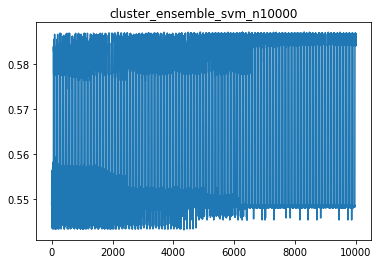

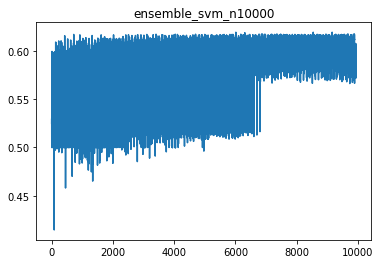

In [4]:
df = pd.read_csv("data/hpo/cluster_ensemble_svm_n10000_0228.csv")
df = df.sort_values(by=['Unnamed: 0'])
plt.plot(df['Unnamed: 0'], df['value'])
plt.title("cluster_ensemble_svm_n10000")
plt.show()

df = pd.read_csv("data/hpo/ensemble_svm_n10000.csv")
df = df.sort_values(by=['Unnamed: 0'])
plt.plot(df['Unnamed: 0'], df['value'])
plt.title("ensemble_svm_n10000")
plt.show()

In [11]:
consensusclass = np.genfromtxt("data/r_output/consensusClass_k10.csv")

In [45]:
output_data = cluster_sampler(x_cytosol, consensusclass, size=len(x_nucleus))
output_y = np.array(np.append(np.ones(len(output_data)), np.zeros(len(x_nucleus))))
output_data = np.append(output_data, x_nucleus, axis=0)
print(output_data.shape)
print(output_y.shape)
prob = svm_problem(output_y, output_data)
param = svm_parameter("-s 1 -t 0")
m = svm_train(prob, param)
p_label, p_acc, p_val = svm_predict(output_y, output_data, m)
print("roc:",metrics.roc_auc_score(output_y, p_label))

(377, 442)
(377,)
Accuracy = 79.3103% (299/377) (classification)
roc: 0.7931325640303968


In [14]:
x_cytosol = pd.read_csv("data/merge_data/k1234_PCPseDNCGa_TNCGa_PseDNC_cytosol.csv").to_numpy()
x_nucleus = pd.read_csv("data/merge_data/k1234_PCPseDNCGa_TNCGa_PseDNC_nucleus.csv").to_numpy()

In [96]:
class ensemble_svm():
    def __init__(self):
        self.model_array = None
    
    def train(self, data, label, parameter=""):
        model_array = []
        for d, l in zip(data, label):
            arr = np.arange(len(l))
            np.random.shuffle(arr)
            d = d[arr]
            l = l[arr]

            prob = svm_problem(l, d)
            param = svm_parameter(parameter)
            m = svm_train(prob, param)
            model_array.append(m)
        
        self.model_array = model_array
        
        return None
    def test(self, x, y):
        output = None
        for m in self.model_array:
            p_label, p_acc, p_val = svm_predict(y, x, m)
            if output is None:
                output = np.array([p_label])
            else:
                output = np.append(output, np.array([p_label]), axis=0)
        
        pred_y = []
        for o in output.T:
            u, c = np.unique(o, return_counts=True)
            pred_y.append(u[c == c.max()][0])
        
        return metrics.roc_auc_score(y, pred_y)
    
    def predict(self, x):
        output = None
        for m in self.model_array:
            p_label, p_acc, p_val = svm_predict([], x, m)
            if output is None:
                output = np.array([p_label])
            else:
                output = np.append(output, np.array([p_label]), axis=0)

        pred_y = []
        pred_y_score = []
        for o in output.T:
            u, c = np.unique(o, return_counts=True)
            pred_y.append(u[c == c.max()][0])
            pred_y_score.append(c.max() / sum(c))
        
        return pred_y, pred_y_score
    

In [18]:
def cluster_sampler(data, cluster_class, size=100):
    class_nums, class_counts = np.unique(cluster_class, return_counts=True)
    l = len(data)
    output_data = None
    for i in range(len(class_nums)):
        class_idx = np.arange(l)[cluster_class == class_nums[i]]
        n = math.ceil(size / l * len(class_idx))
        np.random.shuffle(class_idx)
        if output_data is None:
            output_data = data[class_idx[:n], :]
        else:
            output_data = np.append(output_data, data[class_idx[:n], :], axis=0)
    return output_data


# l = 5
# cluster_data = np.zeros((sum(range(1, l + 1)), 2))
# cluster_class = np.zeros(sum(range(1, l + 1)))
# for i in range(1, l + 1):
#     cluster_data[sum(range(i)):sum(range(i + 1))] = cluster_data[sum(range(i)):sum(range(i + 1))] + i
#     cluster_class[sum(range(i)):sum(range(i + 1))] = cluster_class[sum(range(i)):sum(range(i + 1))] + i

# print(cluster_data)
# print(cluster_class)

# cluster_sampler(cluster_data, cluster_class, size=5)

In [50]:
cv_x_cytosol, cv_consensuclass = ensemble_svm.CV(x_cytosol, consensusclass, 10)
cv_x_nucleus, _ = ensemble_svm.CV(x_nucleus, np.ones((len(x_nucleus))), 10)
print(x_cytosol.shape, consensusclass.shape)
print(cv_x_cytosol[0])
print(np.unique(consensusclass, return_counts=True)[1] / len(consensusclass))
print(np.unique(cv_consensuclass[0], return_counts=True)[1] / len(cv_consensuclass[0]))
# print(cv_consensuclass[0])

(2245, 442) (2245,)
[[0.31823124 0.24465386 0.28742298 ... 0.01312326 0.14710572 0.11397461]
 [0.29040404 0.25378788 0.27588384 ... 0.02159721 0.15349595 0.11863209]
 [0.29695886 0.2236136  0.29516995 ... 0.02169424 0.14125585 0.11626986]
 ...
 [0.23017241 0.32327586 0.24051724 ... 0.03133455 0.15252467 0.1205138 ]
 [0.24978467 0.30318691 0.22911283 ... 0.03868025 0.1525839  0.1230972 ]
 [0.21189024 0.33536585 0.27896341 ... 0.02775185 0.14873931 0.1230522 ]]
[0.07483296 0.10690423 0.13496659 0.13140312 0.11893096 0.10155902
 0.11314031 0.06414254 0.12739421 0.02672606]
[0.07272727 0.10909091 0.13636364 0.13181818 0.11818182 0.1
 0.11363636 0.06363636 0.12727273 0.02727273]


In [33]:
output_data = cluster_sampler(x_cytosol, consensusclass, size=len(x_nucleus))
print(output_data.shape)

output_y = np.array([np.append(np.ones(len(output_data)), np.zeros(len(x_nucleus)))])
print(output_y.shape)
output_data = np.append(output_data, x_nucleus, axis=0)
print(x_nucleus.shape)
print(output_data.shape)

(190, 442)
(1, 377)
(187, 442)
(377, 442)


TypeError: len() takes exactly one argument (0 given)

In [39]:
size = 10

ensemble_data = None
for i in range(size):
    output_data = cluster_sampler(x_cytosol, consensusclass, size=len(x_nucleus))
    
    output_y = np.array([np.append(np.ones(len(output_data)), np.zeros(len(x_nucleus)))])
    
    output_data = np.append(output_data, x_nucleus, axis=0)
    output_data = np.array([output_data])

    if ensemble_data is None:
        ensemble_data = output_data
    else:
        ensemble_data = np.append(ensemble_data, output_data, axis=0)
print(ensemble_data.shape)

(1000, 377, 442)


In [60]:
def cv_train_test(cv_x, cv_y):
    for j in range(len(cv_x)):
        train_x = None
        for i in range(len(cv_x)):
            if i == j :
                test_x = cv_x[i]
                test_y = cv_y[i]
            else:
                if train_x is None:
                    train_x = cv_x[i]
                    train_y = cv_y[i]
                else:
                    train_x = np.append(train_x, cv_x[i], axis=0)
                    train_y = np.append(train_y, cv_y[i], axis=0)
    return train_x, train_y, test_x, test_y

In [102]:
auroc_array = []

folder = 10
size = 3000

cv_x_cytosol, cv_consensuclass = svm_function.CV(x_cytosol, consensusclass, 10)
cv_x_nucleus, cv_y_nucleus = svm_function.CV(x_nucleus, np.zeros((len(x_nucleus))), 10)

for i in range(folder):
    train_cytosol_x, train_cytosol_consensuclass, test_cytosol_x, _ = cv_train_test(cv_x_cytosol, cv_consensuclass)
    train_nucleus_x, train_nucleus_y, test_nucleus_x, test_nucleus_y = cv_train_test(cv_x_nucleus, cv_y_nucleus)
    
    test_x = np.append(test_cytosol_x, test_nucleus_x, axis=0)
    test_y = np.append(np.ones(len(test_cytosol_x)), np.zeros(len(test_nucleus_x)), axis=0)
    
    # print(train_cytosol_x.shape)
    # print(train_nucleus_x.shape)
    # print(test_cytosol_x.shape)
    # print(test_nucleus_x.shape)
    # print(test_x.shape)
    # print(test_y.shape)
    
    ensemble_data_x = None
    ensemble_data_y = None
    for j in range(size):
        output_data = cluster_sampler(train_cytosol_x, train_cytosol_consensuclass, size=len(train_nucleus_x))
        
        output_y = np.array([np.append(np.ones(len(output_data)), np.zeros(len(train_nucleus_x)))])
        
        output_data = np.append(output_data, train_nucleus_x, axis=0)
        output_data = np.array([output_data])
        if ensemble_data_x is None:
            ensemble_data_x = output_data
            ensemble_data_y = output_y
        else:
            ensemble_data_x = np.append(ensemble_data_x, output_data, axis=0)
            ensemble_data_y = np.append(ensemble_data_y, output_y, axis=0)
    print(ensemble_data_x.shape)
    print(ensemble_data_y.shape)
    
    esvm = ensemble_svm()
    esvm.train(ensemble_data_x, ensemble_data_y, parameter="-t 0")
    pred_y, pred_y_score = esvm.predict(test_x)
    auroc = metrics.roc_auc_score(test_y, pred_y)
    # auroc = esvm.test(test_x, test_y)
    print("pred_y_score:", pred_y_score)
    print("auroc:", auroc)
    auroc_array.append(auroc)
    
    break

print("auroc:", auroc_array)
print("auroc avg:", sum(auroc_array) / len(auroc_array))

In [27]:
pd.DataFrame(data_x).to_csv('data/linear_features/linear/train/k3p10nor3.csv', index=False)

In [2]:
df = pd.read_csv("data/merge_data/k1234_PCPseDNCGa_TNCGa_PseDNC.csv")
y = np.load("data/data_y_train.npy")

In [18]:
df_n = df[y == 0]
print(len(df_n))
df_n.to_csv('data/merge_data/k1234_PCPseDNCGa_TNCGa_PseDNC_nucleus.csv', index=False)

187


In [8]:
l = np.load("data/k_mers/train/k4_datax.npy")
l = pd.DataFrame(l)
l.sort_values(by=[3], ascending=False)

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.028231,0.015331,0.036520,0.036271,0.042565,0.016328,0.022373,0.052038,0.007603,0.002431,...,0.000312,0.000312,0.000436,0.000312,0.000125,0.000062,0.000000,0.000000,0.000000,0.000000
1647,0.003778,0.010076,0.016373,0.027708,0.020151,0.007557,0.007557,0.012594,0.003778,0.005038,...,0.001259,0.001259,0.003778,0.001259,0.002519,0.002519,0.001259,0.001259,0.002519,0.002519
1104,0.000659,0.003955,0.003296,0.027027,0.020435,0.007251,0.004614,0.005933,0.000659,0.001318,...,0.000659,0.001318,0.000000,0.000000,0.002637,0.000000,0.001318,0.001318,0.001318,0.000659
2209,0.003448,0.003448,0.006897,0.024138,0.013793,0.006897,0.000000,0.010345,0.000000,0.006897,...,0.010345,0.003448,0.003448,0.000000,0.006897,0.000000,0.006897,0.000000,0.000000,0.003448
1992,0.000000,0.003711,0.016698,0.024119,0.007421,0.003711,0.001855,0.011132,0.003711,0.007421,...,0.000000,0.001855,0.001855,0.000000,0.001855,0.000000,0.000000,0.001855,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.004425,0.006637,0.002212,0.000000,0.000000,0.002212,0.000000,0.004425,0.002212,0.000000,...,0.006637,0.000000,0.002212,0.004425,0.004425,0.000000,0.002212,0.002212,0.000000,0.002212
1877,0.001637,0.003273,0.001637,0.000000,0.001637,0.004910,0.001637,0.006547,0.000000,0.001637,...,0.006547,0.003273,0.000000,0.000000,0.004910,0.006547,0.003273,0.001637,0.001637,0.000000
2243,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.017544,0.000000,0.000000,0.017544,0.000000,0.017544,0.017544,0.000000
2240,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012821,0.000000,0.000000,0.012821,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012821,0.000000,0.000000,0.000000


In [23]:
from Function.ensemble_svm import cv_msvm_score

files_path = ["data/k_mers/train/k1234_datax.npy",
              "data/Pse_in_One2/DNA/train/cdhit80_data_seq_loc75_train_PCPseDNCGeneral_all_index.csv",
              "data/Pse_in_One2/DNA/train/cdhit80_data_seq_loc75_train_PCPseTNCGeneral_all_index.csv",
              "data/Pse_in_One2/DNA/train/cdhit80_data_seq_loc75_train_PseDNC.csv"]

data_y = np.load("data/data_y_train.npy")

log_array = []
start_time = time.time()
data_x = None
for file_name in files_path:
    print(file_name)
    file_time = time.time()
    if file_name.split(".")[-1] == "csv":
        tump = np.genfromtxt(file_name, delimiter=',')
    if file_name.split(".")[-1] == "npy":
        tump = np.load(file_name)
        # data_x = data_x.reshape(data_x.shape[0],-1)
    data_x = tump if data_x is None else np.c_[data_x, tump]
print(data_x.shape)
# score_array = cv_msvm_score(data_x, data_y, 10, size=500, parameter="")
# cv_msvm_auroc = sum(score_array) / len(score_array)
# print(cv_msvm_auroc)

data/k_mers/train/k1234_datax.npy
data/Pse_in_One2/DNA/train/cdhit80_data_seq_loc75_train_PCPseDNCGeneral_all_index.csv
data/Pse_in_One2/DNA/train/cdhit80_data_seq_loc75_train_PCPseTNCGeneral_all_index.csv
data/Pse_in_One2/DNA/train/cdhit80_data_seq_loc75_train_PseDNC.csv
(2432, 442)


In [45]:
from sklearn.cluster import KMeans

from consensusClustering import ConsensusCluster
comb = ConsensusCluster(cluster=KMeans, L=1, K=15, H=10)
comb.fit(data_x)
temp = comb.predict()

In [15]:
# data_x = np.load("data/linear_features/linear/k3p10nor3.npy")
# data_x = data_x.reshape(data_x.shape[0],-1)
data_x = np.genfromtxt("data/Pse_in_One2/DNA/cdhit80_data_seq_loc75_PCPseDNCGeneral_all_index.csv", delimiter=',')
data_y = np.load("data/linear_features/data_y.npy")

comb_num = 2

for i in range(2, comb_num + 1):
    combins = [c for c in combinations(range(data_x.shape[1]), i)]
    for c in combins:
        x_train, x_test, y_train, y_test = train_test_split(data_x[:, c], data_y, test_size=0.20, shuffle=True, random_state=12)
        
        macro = cv_msvm_score(data_x[:, c], data_y, 10)
        print(macro)
        break
    break

Accuracy = 36.6337% (111/303) (classification)
Accuracy = 70.9571% (215/303) (classification)
Accuracy = 54.7855% (166/303) (classification)
Accuracy = 22.4422% (68/303) (classification)
Accuracy = 25.7426% (78/303) (classification)
Accuracy = 26.0726% (79/303) (classification)
Accuracy = 63.6964% (193/303) (classification)
Accuracy = 68.3168% (207/303) (classification)
Accuracy = 24.0924% (73/303) (classification)
Accuracy = 70.9571% (215/303) (classification)
Accuracy = 11.2211% (34/303) (classification)
Accuracy = 7.26073% (22/303) (classification)
Accuracy = 36.9637% (112/303) (classification)
Accuracy = 24.0924% (73/303) (classification)
Accuracy = 56.7657% (172/303) (classification)
Accuracy = 66.0066% (200/303) (classification)
Accuracy = 29.703% (90/303) (classification)
Accuracy = 7.92079% (24/303) (classification)
Accuracy = 19.1419% (58/303) (classification)
Accuracy = 40.9241% (124/303) (classification)
Accuracy = 27.0627% (82/303) (classification)
Accuracy = 33.6634% (102/

In [44]:
merge_df = None
for i in range(1, 6):
    if i != 2:
        print(i)    
        l = np.load("data/log/pseinone_cv_msvm_f10s"+str(i)+"00.npy")
        df = pd.DataFrame(l, columns=["file name", "Feature num", "time", "s" + str(i) + "00"]).drop(['time'], axis=1)
        if merge_df is None:
            merge_df = df
        else:
            merge_df = merge_df.merge(df, how="inner", on=["file name", "Feature num"])
        print(merge_df)

1
                                        file name Feature num  \
0             cdhit80_data_seq_loc75_aucg_DAC.csv          12   
1             cdhit80_data_seq_loc75_aucg_DCC.csv          60   
2             cdhit80_data_seq_loc75_aucg_MAC.csv           6   
3           cdhit80_data_seq_loc75_aucg_NMBAC.csv           6   
4        cdhit80_data_seq_loc75_aucg_PCPseDNC.csv          18   
5        cdhit80_data_seq_loc75_aucg_SCPseDNC.csv          28   
6   cdhit80_data_seq_loc75_aucg_mismatch_k3m2.csv          64   
7   cdhit80_data_seq_loc75_aucg_mismatch_k3m1.csv          64   
8   cdhit80_data_seq_loc75_aucg_mismatch_k2m1.csv          16   
9   cdhit80_data_seq_loc75_aucg_mismatch_k4m1.csv         256   
10  cdhit80_data_seq_loc75_aucg_mismatch_k4m2.csv         256   
11  cdhit80_data_seq_loc75_aucg_mismatch_k4m3.csv         256   

                  s100  
0   0.5128660984767431  
1   0.5072936004412559  
2   0.5063051040027182  
3   0.5278744563234673  
4   0.5276809130144483  
5 

In [14]:
import math

from sklearn import metrics

from libsvm.svmutil import svm_problem
from libsvm.svmutil import svm_parameter
from libsvm.svmutil import svm_train
from libsvm.svmutil import svm_predict

class multi_SVM():
    def __init__(self, class_weight='None'):
        self.class_weight = class_weight
        self.model_array = None
    
    def train(self, x, y, size=1, parameter=""):
        if self.class_weight == 'balanced':
            data = None
            label = None
            for i in range(size):
                d, l = self.balanced_data(x, y)
                if data is None:
                    data = d
                    label = l
                else:
                    data = np.append(data, d, axis=0)
                    label = np.append(label, l, axis=0)
        
        model_array = []
        for d, l in zip(data, label):
            arr = np.arange(len(l))
            np.random.shuffle(arr)
            d = d[arr]
            l = l[arr]

            prob = svm_problem(l, d)
            param = svm_parameter(parameter)
            m = svm_train(prob, param)
            model_array.append(m)
        
        self.model_array = model_array
        
        return None
    
    def test(self, x, y):
        output = None
        for m in self.model_array:
            p_label, p_acc, p_val = svm_predict(y, x, m)
            if output is None:
                output = np.array([p_label])
            else:
                output = np.append(output, np.array([p_label]), axis=0)
        
        pred_y = []
        for o in output.T:
            u, c = np.unique(o, return_counts=True)
            pred_y.append(u[c == c.max()][0])
        
        return metrics.roc_auc_score(y, pred_y)
    
    def predict(self, x):
        output = None
        for m in self.model_array:
            p_label, p_acc, p_val = svm_predict([], x, m)
            if output is None:
                output = np.array([p_label])
            else:
                output = np.append(output, np.array([p_label]), axis=0)
        
        pred_y = []
        for o in output.T:
            u, c = np.unique(o, return_counts=True)
            pred_y.append(u[c == c.max()][0])
        
        return pred_y
    
    def balanced_data(self, x, y):
        unique, count = np.unique(y, return_counts=True)
        min_count = min(count)
        big_batch = math.ceil(max(count) / min_count)
        min_u = np.where(count == min_count, unique, -1)
        
        data = None
        label = None
        for u in unique:
            u_data = None
            if not u in min_u:
                while u_data is None or len(u_data) != big_batch * min_count:
                    x_u = x[y == u]
                    np.random.shuffle(x_u)
                    mod = len(x_u) % min_count
                    if mod != 0:
                        arr = np.arange(len(x_u) - mod)
                        np.random.shuffle(arr)
                        x_u = np.append(x_u, x_u[arr[mod - min_count:]], axis=0)
                    if u_data is None:
                        u_data = x_u
                    else:
                        u_data = np.append(u_data, x_u[:(big_batch * min_count) - len(u_data)], axis=0)
                u_data = np.array(np.split(u_data, big_batch))
            else:
                x_u = x[y == u]
                x_u = np.expand_dims(x_u, axis=0)
                u_data = np.repeat(x_u, big_batch, axis=0)

            if data is None:
                data = u_data
                label = np.full((big_batch, min_count), u)
            else:
                data = np.append(data, u_data, axis=1)  
                label = np.append(label, np.full((big_batch, min_count), u), axis=1)

        return data, label

def CV(x, y, folder):
    unique, count = np.unique(y, return_counts=True)
    cv_x = []
    cv_y = []
    for u in unique:
        u_x = x[y == u]
        u_y = y[y == u]
        arr = np.arange(len(u_x))
        np.random.shuffle(arr)
        u_x = u_x[arr]
        u_y = u_y[arr]
        
        linspace = np.linspace(0, len(u_x), folder + 1, dtype=int)
        
        for i in range(folder):
            if unique[0] == u:
                cv_x.append(u_x[linspace[i]:linspace[i+1]])
                cv_y.append(u_y[linspace[i]:linspace[i+1]])
            else:
                cv_x[i] = np.append(cv_x[i], u_x[linspace[i]:linspace[i+1]], axis=0)
                cv_y[i] = np.append(cv_y[i], u_y[linspace[i]:linspace[i+1]], axis=0)
    return cv_x, cv_y

def cv_msvm_score(x, y, folder, size=15, parameter=""):
    cv_x, cv_y = CV(x, y, folder)
    score_array = []
    for j in range(len(cv_x)):
        train_x = None
        for i in range(len(cv_x)):
            if i == j :
                test_x = cv_x[i]
                test_y = cv_y[i]
            else:
                if train_x is None:
                    train_x = cv_x[i]
                    train_y = cv_y[i]
                else:
                    train_x = np.append(train_x, cv_x[i], axis=0)
                    train_y = np.append(train_y, cv_y[i], axis=0)
        msvm = multi_SVM(class_weight='balanced')
        msvm.train(train_x, train_y, size=size, parameter=parameter)
        score_array.append(msvm.test(test_x, test_y))
    return score_array


In [3]:
data_x = np.load("data/linear_features/linear/k3p10nor3.npy")
data_x = data_x.reshape(data_x.shape[0],-1)
data_y = np.load("data/linear_features/data_y.npy")
macro_np = None
for i in range(data_x.shape[1]):
    # x_train, x_test, y_train, y_test = train_test_split(data_x[:, i, :], data_y, test_size=0.20, shuffle=True, random_state=12)
    
    # prob = svm_problem(y_train, x_train)
    # param = svm_parameter('')
    # m = svm_train(prob, param)
    # p_label, p_acc, p_val = svm_predict(y_test, x_test, m)
    # macro = f1_score(p_label, y_test, average='macro')
    
    # msvm = multi_SVM(class_weight='balanced')
    # msvm.train(x_train, y_train, size=15)
    # macro = msvm.test(x_test, y_test)
    
    macro = cv_msvm_score(data_x[:, i, :], data_y, 10)
    
    print("macro:", macro)
    temp = np.array([[i, macro]])
    if macro_np is None:
        macro_np = temp
    else:
        macro_np = np.append(macro_np, temp, axis=0)
print(macro_np)

Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (classification)
Accuracy = 12.9934% (79/608) (clas

In [48]:
data_x = np.load("data/linear_features/linear/k4p10nor3.npy")
data_x = data_x.reshape(data_x.shape[0],-1)
data_x = np.c_[ data_x, np.load("data/linear_features/data_len.npy") ] 
data_y = np.load("data/linear_features/data_y.npy")

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.20, shuffle=True, random_state=12)
# print("SVC")
# clf = svm.SVC()
# clf.fit(x_train, y_train)
# y_pred = clf.predict(x_test)
# print("macro:", f1_score(y_test, y_pred, average='macro'))

# print("SVM")
# prob = svm_problem(y_train, x_train)
# param = svm_parameter('')
# m = svm_train(prob, param)
# p_label, p_acc, p_val = svm_predict(y_test, x_test, m)
# print("macro:", f1_score(p_label, y_test, average='macro'))

print("mSVM")
msvm = multi_SVM(class_weight='balanced')
msvm.train(x_train, y_train, size=15)
msvm.test(x_test, y_test)

mSVM


In [17]:
x = np.load("data/linear_features/score_history/dle_point_score_history_1639120891.2122715.npy")
# x = np.around(x, decimals=2)
# print(x.shape)
# print(x[x[:, 3].argsort()][::-1][:10])
x = x[x[:, -1].argsort()][::-1]
x = pd.DataFrame(x, columns=["k", "power", "nor", "num", "features", "acc", "f1 macro"])
x.head(20)

,k,power,nor,num,features,acc,f1 macro
0,4.0,8.0,3.0,10.0,2560.0,0.878289,0.589354
1,4.0,8.0,3.0,8.0,2048.0,0.876645,0.579890
2,4.0,10.0,3.0,8.0,2048.0,0.868421,0.571936
3,4.0,10.0,3.0,10.0,2560.0,0.868421,0.571936
4,4.0,10.0,3.0,5.0,1280.0,0.866776,0.562687
5,4.0,8.0,3.0,3.0,768.0,0.837171,0.558629
6,4.0,8.0,3.0,5.0,1280.0,0.866776,0.554651
7,3.0,8.0,3.0,10.0,640.0,0.763158,0.550877
8,4.0,10.0,3.0,3.0,768.0,0.832237,0.548449
9,3.0,8.0,3.0,8.0,512.0,0.746711,0.535473


In [8]:
df = pd.read_csv("data/linear_features/cdhit80_data_seq_loc75_train.csv")
df.head(3)

,Unnamed: 0,Refseq_ID,Gene_ID,Sequence,loc
0,8,NM_002457.4,NCBI:4583,CAACCCACACCGCCCCTGCCAGCCACCATGGGGCTGCCACTAGCCC...,Cytosolic
1,12,NR_073405.1,NCBI:441733,AGCACGCTGGCGGCTACCAAGCTGGAGGAGGCGGCGGGCGCGAGAC...,Cytosolic
2,13,NR_027418.1,NCBI:100499466,CTCGCCCCCCCGGAGCCGACAAATGGCCGCGGCGGCCTCAGGTCCG...,Cytosolic


In [11]:
np.save("data/linear_features/data_len.npy", np.array(df['Sequence'].apply(len)))

In [33]:
df = pd.read_csv("data/lncATLAS/2021-11-25_lncATLAS_all_data.csv")

In [61]:
nc_df = df[df["Coding Type"] == 'nc']

# nc_df = nc_df[nc_df["Data Type"].isin(["cytosol", "nucleus"])]
nc_df = nc_df[(nc_df["Value"].notna()) & (nc_df["Value"] > 0)]
c_df = nc_df[nc_df["Data Type"] == "cytosol"]
n_df = nc_df[nc_df["Data Type"] == "nucleus"]

In [71]:
cell_line = nc_df["Data Source"].unique()
print(nc_df.head(4))
# c_df = c_df[c_df["Value"] > 0.1]
# n_df = n_df[n_df["Value"] > 0.1]

             ENSEMBL ID Data Source Data Type    Value  Gene Name Coding Type  \
107011  ENSG00000082929       MCF.7      cell  0.33500  LINC01587          nc   
107012  ENSG00000082929       MCF.7   cytosol  0.96500  LINC01587          nc   
107013  ENSG00000082929       MCF.7   nucleus  0.41000  LINC01587          nc   
107014  ENSG00000082929       MCF.7    ratio2  1.23491  LINC01587          nc   

       Biotype  
107011      nc  
107012      nc  
107013      nc  
107014      nc  


In [76]:
print(len(nc_df))
print(len(c_df))
print(len(n_df))

160119
39696
46517


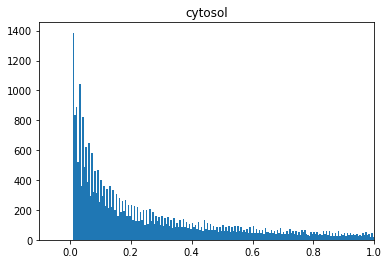

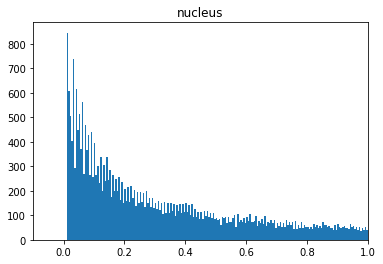

In [67]:
v_np = np.array(c_df["Value"])
# plt.hist(v_np, bins='auto')
plt.hist(v_np, bins=np.sort(np.array(c_df["Value"].unique())))
plt.xlim(-0.1, 1)
plt.title("cytosol")
plt.show()

v_np = np.array(n_df["Value"])
# plt.hist(v_np, bins='auto')
plt.hist(v_np, bins=np.sort(np.array(n_df["Value"].unique())))
plt.xlim(-0.1, 1)
plt.title("nucleus")
plt.show()

In [8]:
cnrci = df[df["Data Type"] == "CNRCI"]
cnrci = cnrci[cnrci["Value"].notna()]
cnrci = cnrci[cnrci["Coding Type"] == 'nc']
ensembl_id = cnrci["ENSEMBL ID"].unique()

In [9]:
cnrci#["Biotype"].unique()

,ENSEMBL ID,Data Source,Data Type,Value,Gene Name,Coding Type,Biotype
31474,ENSG00000082929,MCF.7,CNRCI,1.23491,LINC01587,nc,nc
39740,ENSG00000093100,A549,CNRCI,-3.15798,XXbac-B461K10.4,nc,nc
39741,ENSG00000093100,GM12878,CNRCI,-2.00351,XXbac-B461K10.4,nc,nc
39742,ENSG00000093100,H1.hESC,CNRCI,-2.21820,XXbac-B461K10.4,nc,nc
39743,ENSG00000093100,HeLa.S3,CNRCI,-2.05661,XXbac-B461K10.4,nc,nc
...,...,...,...,...,...,...,...
714484,ENSG00000283122,HepG2,CNRCI,-2.58496,HYMAI,nc,nc
714485,ENSG00000283122,HT1080,CNRCI,-1.48543,HYMAI,nc,nc
714487,ENSG00000283122,IMR.90,CNRCI,-3.30581,HYMAI,nc,nc
714494,ENSG00000283122,MCF.7,CNRCI,-3.54432,HYMAI,nc,nc


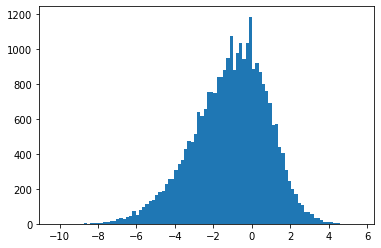

In [11]:
v_np = np.array(cnrci["Value"])
plt.hist(v_np, bins='auto')
# plt.xlim(-0.5, 10)
plt.show()

In [ ]:
variance = []
for eidx in ensembl_id:
    if len(cnrci[cnrci["ENSEMBL ID"] == eidx]["Value"]) > 1:
        variance.append(statistics.variance(cnrci[cnrci["ENSEMBL ID"] == eidx]["Value"]))

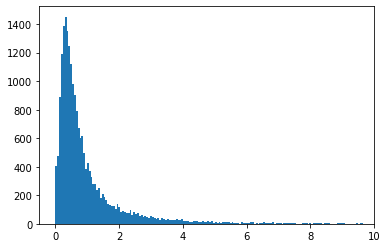

In [59]:
v_np = np.array(variance)
plt.hist(v_np, bins='auto')
plt.xlim(-0.5, 10)
plt.show()

In [21]:
nc_count = pd.DataFrame([], columns=["id", "N", "C"])
for eidx in ensembl_id:
    temp = pd.DataFrame([[eidx, len(cnrci[(cnrci["ENSEMBL ID"] == eidx) & (cnrci["Value"] > 0)]) , len(cnrci[(cnrci["ENSEMBL ID"] == eidx) & (cnrci["Value"] < 0)])]], columns=["id", "N", "C"])
    nc_count = nc_count.append(temp)
print(nc_count.head(10))

                id  N   C
0  ENSG00000082929  1   0
0  ENSG00000093100  0  15
0  ENSG00000099869  2   0
0  ENSG00000100181  1   4
0  ENSG00000116652  1   6
0  ENSG00000116883  0  10
0  ENSG00000117242  7   7
0  ENSG00000120055  4   1
0  ENSG00000120664  1   2
0  ENSG00000124915  0   2


In [30]:
nc_count["SUM"] = nc_count["N"] + nc_count["C"]
nc_count = nc_count[nc_count["SUM"] > 0]
nc_count["N/SUM"] = nc_count["N"] * (1 / nc_count["SUM"])
print(nc_count.head(5))

                id  N   C SUM     N/SUM
0  ENSG00000082929  1   0   1         1
0  ENSG00000093100  0  15  15         0
0  ENSG00000099869  2   0   2         1
0  ENSG00000100181  1   4   5       0.2
0  ENSG00000116652  1   6   7  0.142857


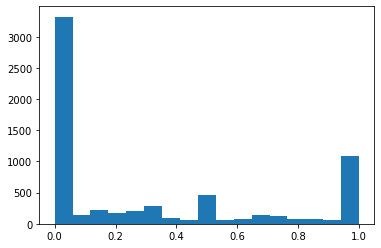

In [32]:
v_np = np.array(nc_count["N/SUM"])
plt.hist(v_np, bins='auto')
# plt.xlim(-0.5, 10)
plt.show()

In [16]:
nc_count = nc_count.groupby(by=["N", "C"]).count().reset_index()

In [17]:
h_m = np.zeros((15,15))

for n in range(15):
    for c in range(15):
        if len(nc_count[(nc_count["N"] == n) & (nc_count["C"] == c)]):
            h_m[n, c] = int(list(nc_count[(nc_count["N"] == n) & (nc_count["C"] == c)]["id"])[0])

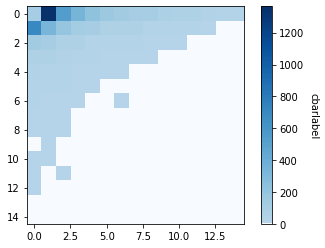

In [20]:
fig, ax = plt.subplots()
bottom = plt.cm.get_cmap('Blues', 128)
newcolors = np.vstack((bottom(0),
                       bottom(np.linspace(0.3, 1, 128))))
newcmp = matplotlib.colors.ListedColormap(newcolors, name='OrangeBlue')
im = ax.imshow(h_m, cmap=newcmp)
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("cbarlabel", rotation=-90, va="bottom")
plt.show()

In [43]:
score_history = np.load("data/linear_features/score_history/score_history.npy")
# score_history = score_history[score_history[:, 3].argsort()]
score_history = pd.DataFrame(score_history, columns=["k", "power", "normalization", "acc", "f1_score_macro"])
print(score_history)
# score_history.to_csv("data/linear_features/score_history/dle_point_score_history_1123.csv", index=False)

      0     1    2         3
0   1.0   4.0  0.0  0.552361
1   1.0   4.0  1.0  0.577002
2   1.0   4.0  2.0  0.535934
3   1.0   4.0  3.0  0.542094
4   1.0   6.0  0.0  0.546201
..  ...   ...  ...       ...
59  4.0   8.0  3.0  0.924025
60  4.0  10.0  0.0  0.683778
61  4.0  10.0  1.0  0.882957
62  4.0  10.0  2.0  0.850103
63  4.0  10.0  3.0  0.928131

[64 rows x 4 columns]


In [2]:
df = pd.read_csv("data/linear_features/cdhit80_data_seq_loc75.csv")

In [3]:
data_x = df["Sequence"]
data_y = np.where(df["loc"].to_numpy() == "Cytosolic", 1, 0)

In [5]:
np.save("data/linear_features/data_y.npy", data_y)

In [4]:
x = np.load("data/linear_features/cdhit80_loc75_k1_power8_nor3.npy")
print(x.shape)

(2432, 37)


In [ ]:
x = None
for i in range(64):
    if x is None:
        x = np.array([data_x[:, i*10 + 4]]).T
        # x = np.array([data_x[:, i*10], data_x[:, i*10 + 9]]).T
        # x = np.array([np.average(data_x[:, i*10:(i+1)*10], axis=1)]).T
    else:
        x = np.append(x, np.array([data_x[:, i*10 + 4]]).T, axis=1)
        # x = np.append(x, np.array([data_x[:, i*10], data_x[:, i*10 + 9]]).T, axis=1)
        # x = np.append(x, np.array([np.average(data_x[:, i*10:(i+1)*10], axis=1)]).T, axis=1)
print(x.shape)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, data_y, test_size=0.20, shuffle=True, random_state=12)

In [6]:
print(np.unique(data_y, return_counts=True))
print(np.unique(y_train, return_counts=True))

(array([0, 1]), array([ 187, 2245]))
(array([0, 1]), array([ 147, 1798]))


In [6]:
clf = svm.SVC(kernel='linear', class_weight='balanced')
scores = cross_val_score(clf, x, data_y, cv=5, scoring='f1_macro')

In [7]:
print("score:", scores)
y_pred = clf.predict(x_test)
print("macro:", f1_score(y_test, y_pred, average='macro'))

score: [0.85343261 0.80478554 0.85592885 0.83167797 0.72709271]


NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [7]:
clf = svm.SVC(kernel='linear', C=1, class_weight='balanced').fit(x_train, y_train)
            
score = clf.score(x_test, y_test)
print("score:", score)
y_pred = clf.predict(x_test)
print("macro:", f1_score(y_test, y_pred, average='macro'))

score: 0.971252566735113
macro: 0.9175773694390716


In [8]:
print(np.unique(y_test, return_counts=True))
print(x_test[y_test == 1].shape)
print(x_test[y_test == 0].shape)
print(clf.score(x_test[y_test == 0], y_test[y_test == 0]))
print(clf.score(x_test[y_test == 1], y_test[y_test == 1]))
y_pred = clf.predict(x_test)
print("macro:", f1_score(y_test, y_pred, average='macro'))

(array([0, 1]), array([ 40, 447]))
(447, 37)
(40, 37)
1.0
0.9686800894854586
macro: 0.9175773694390716


In [10]:
import pickle
with open('data/k_mers/model/k1p8n3_svm.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [11]:
with open('data/k_mers/model/k1p8n3_svm.pickle', 'rb') as f:
    clf2 = pickle.load(f)
y_pred = clf2.predict(x_test)
print("macro:", f1_score(y_test, y_pred, average='macro'))

macro: 0.9175773694390716


In [39]:
import time
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn import metrics

from libsvm.svmutil import *
from imblearn.over_sampling import SMOTE

k_array = [1]
nor_array = [2]
num_array = [1]
k_array = [1, 2, 3, 4]
nor_array = [2, 3]
num_array = [1, 2, 3, 5, 8, 10]

data_y = np.load("data/linear_features/data_y.npy")

score_history = None
start_time = time.time()
for k in k_array:
    for nor in nor_array:
        for num in num_array:
            print("k=%s, nor=%s, num=%s" % (k, nor, num))
            
            data_x = np.load("data/linear_features/point/k" + str(k) + "nor" + str(nor) + "n" + str(num) + ".npy")
            data_x = data_x.reshape(data_x.shape[0],-1)
            print(data_x.shape)
            
            x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.20, shuffle=True, random_state=12)
            
            prob = svm_problem(y_train, x_train, isKernel=True)
            param = svm_parameter('-t 0 -w0 1798 -w1 147')
            m = svm_train(prob, param)
            p_label, p_acc, p_val = svm_predict(y_test, x_test, m)
            (score, MSE, SCC) = evaluations(y_test, p_label)
            macro = f1_score(y_test, p_label, average='macro')
            print("score:", score)
            print("macro:", macro)
            print(metrics.confusion_matrix(y_test, p_label) / len(y_test))
            # if macro >= 0.6:
            #     with open("data/linear_features/model/k" + str(k) + "nor" + str(nor) + "n" + str(num) + "point_1122_" + str(start_time) + ".pickle", 'wb') as f:
            #         pickle.dump(clf, f)
            
            if score_history is None:
                score_history = np.array([[k, nor, num, data_x.shape[1], score, macro]])
            else:
                score_history = np.append(score_history, [[k, nor, num, data_x.shape[1], score, macro]], axis=0)
print(score_history)

k=1, nor=2, num=1
(2432, 4)
Accuracy = 41.0678% (200/487) (classification)
score: 41.067761806981515
macro: 0.3470721509821783
[[0.04928131 0.03285421]
 [0.55646817 0.3613963 ]]
k=1, nor=2, num=2
(2432, 8)
Accuracy = 66.7351% (325/487) (classification)
score: 66.73511293634496
macro: 0.44798488664987407
[[0.01848049 0.06365503]
 [0.26899384 0.64887064]]
k=1, nor=2, num=3
(2432, 12)
Accuracy = 29.7741% (145/487) (classification)
score: 29.774127310061605
macro: 0.2699610772143909
[[0.0513347  0.03080082]
 [0.67145791 0.24640657]]
k=1, nor=2, num=5
(2432, 20)
Accuracy = 19.3018% (94/487) (classification)
score: 19.301848049281315
macro: 0.1907117758242316
[[0.0698152  0.01232033]
 [0.79466119 0.12320329]]
k=1, nor=2, num=8
(2432, 32)
Accuracy = 13.1417% (64/487) (classification)
score: 13.141683778234087
macro: 0.13105045366538856
[[0.07597536 0.00616016]
 [0.862423   0.05544148]]
k=1, nor=2, num=10
(2432, 40)
Accuracy = 9.65092% (47/487) (classification)
score: 9.650924024640657
macro: 

In [38]:
from libsvm.svmutil import *
from imblearn.over_sampling import SMOTE

print(np.unique(y_train, return_counts=True))

# sm = SMOTE(random_state=42)
# x_res, y_res = sm.fit_resample(x_train, y_train)
# prob = svm_problem(y_res, x_res, isKernel=True)
prob = svm_problem(y_train, x_train, isKernel=True)
param = svm_parameter('-t 0 -w0 1798 -w1 147')
m = svm_train(prob, param)
p_label, p_acc, p_val = svm_predict(y_test, x_test, m)
print(f1_score(y_test, p_label, average='macro'))

(array([0, 1]), array([ 147, 1798]))
Accuracy = 41.0678% (200/487) (classification)
0.3470721509821783


In [11]:
from libsvm.svmutil import *
from imblearn.over_sampling import SMOTE

prob = svm_problem(data_y, x, isKernel=True)
param = svm_parameter('-v 10')
svm_train(prob, param)

Cross Validation Accuracy = 92.3109%


92.3108552631579

In [43]:
f_array = np.load("data/linear_features/k2_power10.npy")
vocab = np.load("data/linear_features/k2_vocab.npy")
print(f_array.shape)

(2432, 16, 11)


In [44]:
token_out = 10
data = []
for f in f_array:
    f_p = np.array([])
    for z in f:
        p = np.poly1d(z)
        f_p = np.append(f_p, p(np.linspace(0, 1.0, num=token_out)))
    data.append(f_p)
x = np.array(data)
print(x.shape)

(2432, 160)


In [52]:
k = 1
nor_str = "_norL"
data_df = pd.read_csv("data/linear_features/old/cdhit80_k" + str(k) + "_linear10" + nor_str + "_loc75.csv")
vocab = np.load("data/linear_features/old/cdhit80_k" + str(k) + "_vocab.npy")

In [31]:
col = data_df.columns
data_x = data_df[col[:-2]].to_numpy()
data_y = data_df[col[-1]].to_numpy()
data_y = np.where(data_y == "Cytosolic", 1, 0)

idx = np.arange(len(data_y))
np.random.shuffle(idx)
x_train = data_x[idx[:int(len(idx) * 0.8)]]
y_train = data_y[idx[:int(len(idx) * 0.8)]]
x_test = data_x[idx[int(len(idx) * 0.8):]]
y_test = data_y[idx[int(len(idx) * 0.8):]]
print(x_train.shape)
y_weight = np.unique(y_train, return_counts=True)[1]
print(y_weight)
print(x_test.shape)
print(np.unique(y_test, return_counts=True))

(1945, 176)
[ 142 1803]
(487, 176)
(array([0, 1]), array([ 38, 449]))


In [4]:
prob = svm_problem(y_train, x_train, isKernel=True)
param = svm_parameter('-t 1 -c 4 -w0 ' + str(y_weight[1]) + ' -w1 ' + str(y_weight[0]))
m = svm_train(prob, param)
p_label, p_acc, p_val = svm_predict(y_test, x_test, m)

NameError: name 'svm_problem' is not defined

In [32]:
preformance_vacab = []

for i in range(len(vocab)):
    x_v_train = x_train[:, 11*i:11*i+11]
    x_v_test = x_test[:, 11*i:11*i+11]
    # x_v_train = np.append(x_train[:, 11*i:11*i+11], np.array([x_train[:, -1]]).T, axis=1)
    # x_v_test = np.append(x_test[:, 11*i:11*i+11], np.array([x_test[:, -1]]).T, axis=1)
    # prob = svm_problem(y_train, x_train[:, 11*i:11*i+11], isKernel=True)
    # param = svm_parameter('-t 1 -c 10 -w0 ' + str(y_weight[1]) + ' -w1 ' + str(y_weight[0]))
    # m = svm_train(prob, param)
    # p_label, p_acc, p_val = svm_predict(y_test, x_test[:, 11*i:11*i+11], m)
    # f1 = f1_score(y_test, p_label, average=None)
    # print(f1)
    clf = svm.SVC(kernel='rbf', C=1, class_weight='balanced').fit(x_v_train, y_train)
    y_pred = clf.predict(x_v_test)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average=None)
    preformance_vacab.append([i, f1_macro, f1[0], f1[1]])
    # print("score:", clf.score(x_test[:, 11*i:11*i+11], y_test))
preformance_vacab = np.array(preformance_vacab)
preformance_vacab = preformance_vacab[np.argsort(preformance_vacab[:, 1])]

In [33]:
preformance_vacab[-5:]

array([[12.        ,  0.44893685,  0.17283951,  0.7250342 ],
       [11.        ,  0.44952274,  0.16806723,  0.73097826],
       [13.        ,  0.45393055,  0.15454545,  0.75331565],
       [ 1.        ,  0.48629033,  0.1761658 ,  0.79641485],
       [ 7.        ,  0.50354369,  0.16      ,  0.84708738]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.20, shuffle=True, random_state=12)

In [22]:
value_counts = train_df["loc"].value_counts()

for i in range(len(value_counts)):
    while (max(value_counts) - value_counts[i]) / max(value_counts) > .1:
        print((max(value_counts) - value_counts[i]) / max(value_counts))
        train_df = train_df.append(train_df[train_df["loc"] == value_counts.index[i]][:(max(value_counts) - value_counts[i])])
        value_counts = train_df["loc"].value_counts()

print(value_counts)


0.9194444444444444
0.8388888888888889
0.6777777777777778
0.35555555555555557
Cytosolic    1800
Nucleus      1800
Name: loc, dtype: int64


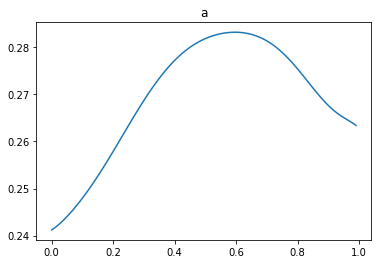

In [55]:
col = data_df.columns
cyt_df = data_df[data_df["loc"] == "Cytosolic"]
cyt_l = cyt_df.loc[:, ["len"]].to_numpy()
cyt_l = np.ones_like(cyt_l)

len_v = int((len(col)-2) / 11)

for i in range(len_v):
    for z, l in zip(cyt_df.loc[:, col[11*i:11*i+11]].to_numpy(), cyt_l):
        t = np.arange(0, l, 0.01)
        p = np.poly1d(z)

        plt.plot(t, p(t), alpha=1, color="#1f77b4")
        break
        
    # plt.xlim(0, np.average(cyt_l))
    plt.title(vocab[i])
    plt.show()
    break


[0.30459667 0.30563531 0.30480713 0.30405863 0.30499612 0.30685001
 0.30871487 0.3108631  0.31331082 0.31590429]


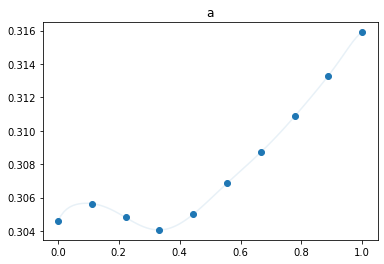

In [59]:
nuc_df = data_df[data_df["loc"] == "Nucleus"]
nuc_l = nuc_df.loc[:, ["len"]].to_numpy()
nuc_l = np.ones_like(nuc_l)
len_v = int((len(col)-2) / 11)

for i in range(len_v):
    for z, l in zip(nuc_df.loc[:, col[11*i:11*i+11]].to_numpy(), nuc_l):
        t = np.arange(0, l, 0.01)
        p = np.poly1d(z)

        plt.plot(t, p(t), alpha=0.1, color="#1f77b4")
        t = np.linspace(0, 1.0, num=10)
        plt.scatter(t, p(t))
        print(p(t))
        break
    # plt.xlim(0, 1)
    plt.title(vocab[i])
    plt.show()
    break

In [106]:
class NN2Layers(torch.nn.Module):
    def __init__(self, ninp: int, nhid: int, ntoken: int, dropout: float=0.0):
        
        super(NN2Layers, self).__init__()
        self.drop = nn.Dropout(dropout)
        self.nn1 = nn.Linear(ninp, nhid)
        self.nn2 = nn.Linear(nhid, ntoken)

        self.init_weights()

        self.ninp = ninp
        self.nhid = nhid
        self.ntoken = ntoken

    def init_weights(self):
        initrange = 0.1
        self.nn1.bias.data.zero_()
        self.nn1.weight.data.uniform_(-initrange, initrange)
        self.nn2.bias.data.zero_()
        self.nn2.weight.data.uniform_(-initrange, initrange)

    def forward(self, x: torch.tensor):

        output = self.nn1(x)
        output = self.drop(output)
        output = self.nn2(output)

        return output.softmax(dim=1)
 
    def predict(self, x: torch.tensor):
        # """預測並輸出機率大的類別

        # Args:
        #     x (torch.tensor): 詞 tensor。如果batch_first=True，input shape為（批次，序列），否則（序列，批次）。

        # Returns:
        #     [torch.tensor]: shape 與 x 一樣，但是序列為類別序列。
        # """
        output = self.forward(x)
        _, output = torch.max(output, 1)

        return output

In [151]:
x = x_train
y = y_train
# y = np.where(y == "Cytosolic" , 1, 0)

unique, counts = np.unique(y, return_counts=True)

y_weight = np.unique(y, return_counts=True)[1] / len(y)
y_weight = np.abs(y_weight - 1)
print(y_weight)

[0.92699229 0.07300771]


In [210]:
ntoken = 2

ninp = x_train.shape[1]
nhid = 512

model = NN2Layers(ninp, nhid, ntoken)
loss_fn = nn.CrossEntropyLoss(weight=torch.tensor(y_weight).to(torch.float))
# optimizer = optim.AdamW(model.parameters(), lr=3e-3, weight_decay=1e-4)
optimizer = optim.SGD(model.parameters(), lr=3e-1)

batch_size = 8
epochs = 500

tensor_x = torch.tensor(x_train).to(torch.float)
tensor_y = torch.tensor(y_train).to(torch.long)

test_x = torch.tensor(x_test).to(torch.float)
test_y = torch.tensor(y_test).to(torch.long)

# dataset = Data.TensorDataset(tensor_x, tensor_y)

# # train_set, valid_set = Data.random_split(dataset, [int(len(dataset) * 0.8), len(dataset) - int(len(dataset) * 0.8)], generator=torch.Generator().manual_seed(42))

# loader = Data.DataLoader(
#     dataset = dataset,
#     batch_size = batch_size,
# )

In [195]:
class Trainer():
    def __init__(self, model, optimizer, loss_fn):
        self.model = model
        self.optimizer = optimizer
        self.loss_fn = loss_fn
    
    def train(self, x, y, epochs = 2, batch_size = 1, epoch_print = True):
        train_dataset = Data.TensorDataset(x, y)
        loader = Data.DataLoader(
            dataset = train_dataset,
            batch_size = batch_size,
        )
        
        start_time = time.time()
        step_size = len(loader)
        for epoch in range(epochs):
            for step, (batch_x, batch_y) in enumerate(loader):
                step_time = time.time()
                
                self.optimizer.zero_grad()
                pred_y = self.model(batch_x)
                loss = self.loss_fn(pred_y, batch_y)
                loss.backward()
                self.optimizer.step()
                
                # print('Epoch: %i | Step: %i/%i | Loss: %.2f | time: %.2f s' % (epoch, step, step_size, loss, time.time() - step_time))
            if epoch_print:
                print('Epoch: %i | Loss: %.2f | time: %.2f s' % (epoch, loss, time.time() - step_time))
        print('All Time: %.2f s | Loss: %.2f' % (time.time() - start_time, loss))
    
    def test(self, x, y):
        y_pred = self.model.predict(x)
        
        one_hot_y = np.eye(self.model.ntoken)[y]
        one_hot_y_pred = np.eye(self.model.ntoken)[y_pred]
        token_acc_array = []
        for i in range(self.model.ntoken):
            y_token = torch.tensor(one_hot_y[:, i])
            y_pred_token = torch.tensor(one_hot_y_pred[:, i])
            
            tp = (y_token * y_pred_token).sum(dim=0).to(torch.float32)
            tn = ((1 - y_token) * (1 - y_pred_token)).sum(dim=0).to(torch.float32)
            fp = ((1 - y_token) * y_pred_token).sum(dim=0).to(torch.float32)
            fn = (y_token * (1 - y_pred_token)).sum(dim=0).to(torch.float32)
            precision = tp / (tp + fp)
            rec = tp / (tp + fn)
            f1 = 2 * rec * precision / (rec + precision)
            token_acc_array.append(f1)
        acc = (y_pred == y).float().sum() / len(y)
        token_acc_array = torch.tensor(token_acc_array)
        return acc, token_acc_array

In [ ]:
trainer = Trainer(model, optimizer, loss_fn)
trainer.train(tensor_x, tensor_y, epochs, batch_size, epoch_print=False)
trainer.test(test_x, test_y)

In [211]:
preformance_vacab = []
for i in range(len(vocab)):
    model = NN2Layers(11, nhid, ntoken)
    trainer = Trainer(model, optimizer, loss_fn)
    trainer.train(tensor_x[:, 11*i:11*i+11], tensor_y, epochs, batch_size, epoch_print=False)
    acc, token_acc_array = trainer.test(test_x[:10, 11*i:11*i+11], test_y[:10])
    
    preformance_vacab.append(np.append(np.array([i, acc, torch.min(token_acc_array)]), token_acc_array))
preformance_vacab = np.array(preformance_vacab)
preformance_vacab = preformance_vacab[np.argsort(preformance_vacab[:, 2])]

All Time: 43.67 s | Loss: 0.69
All Time: 42.74 s | Loss: 0.69
All Time: 43.57 s | Loss: 0.69
All Time: 44.38 s | Loss: 0.69
All Time: 44.36 s | Loss: 0.69
All Time: 43.77 s | Loss: 0.69
All Time: 43.93 s | Loss: 0.69
All Time: 43.48 s | Loss: 0.69
All Time: 43.79 s | Loss: 0.69
All Time: 44.10 s | Loss: 0.69
All Time: 43.94 s | Loss: 0.70
All Time: 43.93 s | Loss: 0.69
All Time: 43.86 s | Loss: 0.69
All Time: 44.28 s | Loss: 0.69
All Time: 44.88 s | Loss: 0.69
All Time: 45.26 s | Loss: 0.69


In [212]:
preformance_vacab

array([[ 0.        ,  0.1       ,         nan,  0.18181819,         nan],
       [ 1.        ,  0.89999998,         nan,         nan,  0.94736838],
       [ 2.        ,  0.1       ,         nan,  0.18181819,         nan],
       [ 3.        ,  0.1       ,         nan,  0.18181819,         nan],
       [ 4.        ,  0.89999998,         nan,         nan,  0.94736838],
       [ 5.        ,  0.89999998,         nan,         nan,  0.94736838],
       [ 6.        ,  0.89999998,         nan,         nan,  0.94736838],
       [ 7.        ,  0.89999998,         nan,         nan,  0.94736838],
       [ 8.        ,  0.89999998,         nan,         nan,  0.94736838],
       [ 9.        ,  0.89999998,         nan,         nan,  0.94736838],
       [10.        ,  0.1       ,         nan,  0.18181819,         nan],
       [11.        ,  0.89999998,         nan,         nan,  0.94736838],
       [12.        ,  0.1       ,         nan,  0.18181819,         nan],
       [13.        ,  0.89999998,     

In [52]:
start_time = time.time()
step_size = len(loader)
for epoch in range(epochs):
    correct = 0
    for step, (batch_x, batch_y) in enumerate(loader):
        step_time = time.time()
        model.zero_grad()
        pred = model(batch_x)
        loss = loss_fn(pred, batch_y)
        # print('Epoch: %i | Step: %i/%i | Loss: %.2f | time: %.2f s' % (epoch, step, step_size, loss, time.time() - step_time))
        loss.backward()
        optimizer.step()
        
        correct += (torch.argmax(pred, dim=1) == batch_y).float().sum()

    accuracy = 100 * correct / len(loader.dataset)
    print('Epoch: %i | Loss: %.2f | Accuracy: %.2f | time: %.2f s' % (epoch, loss, accuracy, time.time() - step_time))

print('all time : ', time.time() - start_time,'s')

Epoch: 0 | Loss: 0.67 | Accuracy: 91.57 | time: 0.01 s
Epoch: 1 | Loss: 0.65 | Accuracy: 92.19 | time: 0.00 s
Epoch: 2 | Loss: 0.62 | Accuracy: 92.19 | time: 0.00 s
Epoch: 3 | Loss: 0.59 | Accuracy: 92.19 | time: 0.00 s
Epoch: 4 | Loss: 0.56 | Accuracy: 92.19 | time: 0.00 s
Epoch: 5 | Loss: 0.52 | Accuracy: 92.19 | time: 0.00 s
Epoch: 6 | Loss: 0.49 | Accuracy: 92.19 | time: 0.00 s
Epoch: 7 | Loss: 0.46 | Accuracy: 92.19 | time: 0.00 s
Epoch: 8 | Loss: 0.44 | Accuracy: 92.19 | time: 0.00 s
Epoch: 9 | Loss: 0.42 | Accuracy: 92.19 | time: 0.00 s
Epoch: 10 | Loss: 0.40 | Accuracy: 92.19 | time: 0.00 s
Epoch: 11 | Loss: 0.39 | Accuracy: 92.19 | time: 0.00 s
Epoch: 12 | Loss: 0.38 | Accuracy: 92.19 | time: 0.00 s
Epoch: 13 | Loss: 0.37 | Accuracy: 92.19 | time: 0.00 s
Epoch: 14 | Loss: 0.36 | Accuracy: 92.19 | time: 0.00 s
Epoch: 15 | Loss: 0.35 | Accuracy: 92.19 | time: 0.00 s
Epoch: 16 | Loss: 0.35 | Accuracy: 92.19 | time: 0.00 s
Epoch: 17 | Loss: 0.34 | Accuracy: 92.19 | time: 0.00 s
Ep

KeyboardInterrupt: 

In [138]:
def valid(vaild_data):
    model.eval()
    with torch.no_grad():
        for step, (batch_x, batch_y) in enumerate(loader):
            pred = model(batch_x)
            print(pred.softmax(dim=1))
            print(pred)
            print(batch_y)
            break

valid_loader = Data.DataLoader(
    dataset = valid_set,
    batch_size = 5,
)
valid(valid_loader)

tensor([[0.7311, 0.2689],
        [0.7310, 0.2690],
        [0.7311, 0.2689],
        [0.7311, 0.2689],
        [0.7310, 0.2690],
        [0.7305, 0.2695],
        [0.7311, 0.2689],
        [0.7311, 0.2689],
        [0.7298, 0.2702],
        [0.7311, 0.2689]])
tensor([[1.0000e+00, 2.6870e-09],
        [9.9980e-01, 2.0265e-04],
        [1.0000e+00, 1.9828e-07],
        [1.0000e+00, 2.3776e-15],
        [9.9996e-01, 4.4885e-05],
        [9.9870e-01, 1.3012e-03],
        [1.0000e+00, 1.5889e-10],
        [9.9999e-01, 1.0258e-05],
        [9.9675e-01, 3.2475e-03],
        [1.0000e+00, 8.9727e-10]])
tensor([1, 1, 0, 1, 1, 1, 1, 1, 1, 1])
